In [2]:
#Matrices
import numpy as np

#Matemáticas
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats

import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

#libreria excel
from pandas import ExcelWriter
from pandas import ExcelFile

In [3]:
df_pedidos = pd.read_excel('./PEDIDOS_POR_ITEM.xls', sheet_name='Sheet1')

In [14]:
df_pedidos

,C.O.,Desc. C.O.,Fecha,Item,Referencia,Desc. item,Detalle ext. 1,Desc. detalle ext. 1,Tipo docto.,Nro documento,...,CATEGORIA,SUBCATEGORIA,Divisor márgen promedio,Divisor márgen estándar,f_rowid_movto,numero,f_rowid_pv_docto,f_rowid,f_utilidad_promedio_f,id_clase_docto
0,903,PAGINA WEB FIOTTI,2021-10-01,705,AX0432 ...,INDV SHAPE GOLD,NaN,NaN,PV,PV-00000014,...,DEM - DECO MESA,INDV - INDIVIDUALES,22521,22521,589338,14,365336,365336,14113.00,502
1,100,PUNTO DE VENTA AV 68,2021-10-01,1529,XA0605 ...,ESPEJO DECORATIVO EDLIN REDONDO GRIS/NG,NaN,NaN,PV,PV-00000229,...,DEC - DECORACIÓN,ESPE - ESPEJOS,607441,607441,589349,229,365342,365342,401917.60,503
2,902,VENTAS DIGITALES,2021-10-01,1890,XC0231 ...,TAPETE LAZARO GRIS/NEGRO/VER 140X200 435,NaN,NaN,PV,PV-00000177,...,TAP - TAPETES,TAP3 - TAPETES 140X200 CM,206900,206900,589372,177,365356,365356,116257.00,502
3,100,PUNTO DE VENTA AV 68,2021-10-01,4237,D05307 ...,SALA MODULAR CESAR 3C,00031,F-168 AGO,PV,PV-00000233,...,SOF - SOFAS,MODU - SOFAS MODULARES,2679748,2679748,589389,233,365362,365362,1148205.00,503
4,100,PUNTO DE VENTA AV 68,2021-10-01,1927,XC0022 ...,SALA L RECLINO MEAGAN CON BAUL NEGRO 3C,NaN,NaN,PV,PV-00000234,...,REC - RECLINABLES,RCLL - RECLINABLES EN L,2834370,2834370,589390,234,365363,365363,1726947.00,503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17336,203,PUNTO DE VENTA CALI,2022-01-11,4222,D00986 ...,SOFA LANCER 2P,00188,A-310 AGO,PTR,PTR-00000010,...,SOF - SOFAS,SOF2 - SOFA 2P,0,0,615539,10,375436,375436,-499827.00,506
17337,203,PUNTO DE VENTA CALI,2022-01-11,4210,D00904 ...,POLTRONA VACIA,00035,F-172 N3,PTR,PTR-00000010,...,POL - POLTRONAS,POLT - POLTRONAS,0,0,615542,10,375436,375436,-300484.67,506
17338,203,PUNTO DE VENTA CALI,2022-01-11,4214,D00935 ...,SOFA CAMA SITTON,00083,F-932 AGO,PTR,PTR-00000010,...,SFC - SOFA CAMA,SFCA - SOFA CAMA ABATIBLE,0,0,615559,10,375436,375436,-354123.00,506
17339,1,ADMINISTRACIÓN,2022-01-11,6942,D00504 ...,SOFA CELAYA 2P,00188,A-310 AGO,PTR,PTR-00000063,...,SOF - SOFAS,SOF2 - SOFA 2P,0,0,615599,63,375450,375450,-500129.00,506


In [15]:
df_pedidos.describe()

,C.O.,Item,Bodega,Cant. pedida,Valor subtotal local,Divisor márgen promedio,Divisor márgen estándar,f_rowid_movto,numero,f_rowid_pv_docto,f_rowid,f_utilidad_promedio_f,id_clase_docto
count,17341.000000,17341.000000,17341.000000,17341.000000,1.734100e+04,1.734100e+04,1.734100e+04,17341.000000,17341.000000,17341.000000,17341.000000,1.734100e+04,17341.000000
mean,172.921458,2611.926994,71.235454,1.344328,4.235740e+05,4.235740e+05,4.235740e+05,611367.102416,506.561732,373966.586414,373966.586414,9.114183e+04,503.132807
std,222.778435,2169.667157,149.541124,4.142133,5.543910e+05,5.543910e+05,5.543910e+05,12307.299838,404.192646,4663.447355,4663.447355,5.286735e+05,0.902360
min,1.000000,18.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,589336.000000,1.000000,365334.000000,365334.000000,-7.248160e+06,502.000000
25%,100.000000,563.000000,1.000000,1.000000,4.671400e+04,4.671400e+04,4.671400e+04,601146.000000,198.000000,370230.000000,370230.000000,9.321370e+03,503.000000
50%,103.000000,1988.000000,40.000000,1.000000,1.755460e+05,1.755460e+05,1.755460e+05,611105.000000,410.000000,373697.000000,373697.000000,6.468900e+04,503.000000
75%,105.000000,4214.000000,101.000000,1.000000,6.503360e+05,6.503360e+05,6.503360e+05,621757.000000,698.000000,377868.000000,377868.000000,2.210393e+05,503.000000
max,903.000000,7326.000000,923.000000,200.000000,6.175800e+06,6.175800e+06,6.175800e+06,632654.000000,1725.000000,382089.000000,382089.000000,3.110823e+06,506.000000


In [18]:
df_pedidos.columns

Index(['C.O.', 'Desc. C.O.', 'Fecha', 'Item', 'Referencia', 'Desc. item',
       'Detalle ext. 1', 'Desc. detalle ext. 1', 'Tipo docto.',
       'Nro documento', 'Estado movto.', 'Bodega', 'U.M.', 'Cant. pedida',
       'Valor subtotal local', 'Cliente factura',
       'Razón social cliente factura', 'Código vendedor', 'Nombre vendedor',
       'Condición de pago', 'Desc. condición de pago', 'Desc. cond. pago fact',
       'Desc. tipo inventario', 'ORIGEN', 'DEPARTAMENTO', 'CATEGORIA',
       'SUBCATEGORIA', 'Divisor márgen promedio', 'Divisor márgen estándar',
       'f_rowid_movto', 'numero', 'f_rowid_pv_docto', 'f_rowid',
       'f_utilidad_promedio_f', 'id_clase_docto'],
      dtype='object')

In [19]:
df_pedidos["CATEGORIA"]=df_pedidos["CATEGORIA"].astype("category")
df_pedidos["CATEGORIA"]

0          DEM - DECO MESA
1         DEC - DECORACIÓN
2            TAP - TAPETES
3              SOF - SOFAS
4        REC - RECLINABLES
               ...        
17336          SOF - SOFAS
17337      POL - POLTRONAS
17338      SFC - SOFA CAMA
17339          SOF - SOFAS
17340      SFC - SOFA CAMA
Name: CATEGORIA, Length: 17341, dtype: category
Categories (35, object): [' ', 'ARM - ARMARIO', 'BCA - BASE CAMAS', 'BIB - BIBLIOTECAS', ..., 'SIL - SILLAS', 'SIO - SILLAS DE OFICINA', 'SOF - SOFAS', 'TAP - TAPETES']

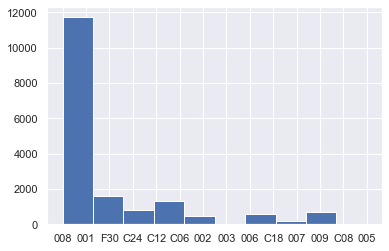

In [28]:
df_pedidos["Condición de pago"].hist();

In [30]:
df_pedidos["Condición de pago"].unique()

array(['008', '001', 'F30', 'C24', 'C12', 'C06', '002', '003', '006',
       'C18', '007', '009', 'C08', '005'], dtype=object)

In [6]:
df_pedidos_DEM=df_pedidos.loc[df_pedidos.loc[:, 'CATEGORIA'] == 'DEM - DECO MESA']
df_pedidos_DEM

,C.O.,Desc. C.O.,Fecha,Item,Referencia,Desc. item,Detalle ext. 1,Desc. detalle ext. 1,Tipo docto.,Nro documento,...,CATEGORIA,SUBCATEGORIA,Divisor márgen promedio,Divisor márgen estándar,f_rowid_movto,numero,f_rowid_pv_docto,f_rowid,f_utilidad_promedio_f,id_clase_docto
0,903,PAGINA WEB FIOTTI,2021-10-01,705,AX0432 ...,INDV SHAPE GOLD,NaN,NaN,PV,PV-00000014,...,DEM - DECO MESA,INDV - INDIVIDUALES,22521,22521,589338,14,365336,365336,14113.0,502
51,100,PUNTO DE VENTA AV 68,2021-10-31,512,AX0198 ...,CENTRO DE MESA FRUTERO DORADO 24*19CM,NaN,NaN,PV,PV-00000499,...,DEM - DECO MESA,CENT - CENTRO DE MESA,77357,77357,597027,499,368797,368797,48545.0,503
78,100,PUNTO DE VENTA AV 68,2021-11-01,708,AX0435 ...,INDV CIRCLE COPPER,NaN,NaN,PV,PV-00000505,...,DEM - DECO MESA,INDV - INDIVIDUALES,5630,5630,597258,505,368858,368858,3325.0,503
153,100,PUNTO DE VENTA AV 68,2021-11-20,684,AX0398 ...,COPA HELADO PURPURA,NaN,NaN,PV,PV-00000677,...,DEM - DECO MESA,VAJI - VAJILLA,9160,9160,601833,677,370482,370482,1882.0,503
176,104,PUNTO DE VENTA CALLE 134,2021-11-28,687,AX0401 ...,COPA HELADO AZUL,NaN,NaN,PV,PV-00000310,...,DEM - DECO MESA,VAJI - VAJILLA,9160,9160,604028,310,371272,371272,1895.0,503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16891,100,PUNTO DE VENTA AV 68,2021-11-07,400,AX0054 ...,BOWL COMIC,NaN,NaN,PV,PV-00000558,...,DEM - DECO MESA,VAJI - VAJILLA,18319,18319,598602,558,369315,369315,8439.0,503
16962,105,PUNTO DE VENTA PLAZA CENTRAL,2021-10-13,716,AX0450 ...,VAJILLA GELATO VAINILLA,NaN,NaN,PV,PV-00000077,...,DEM - DECO MESA,VAJI - VAJILLA,90130,90130,592024,77,366311,366311,3939.0,503
17023,203,PUNTO DE VENTA CALI,2021-10-20,710,AX0440 ...,INDV DEGRADE BLANCO,NaN,NaN,PV,PV-00000138,...,DEM - DECO MESA,INDV - INDIVIDUALES,19160,19160,594586,138,367902,367902,12636.0,503
17139,101,PUNTO DE VENTA OUTLET,2022-01-28,5418,A01077 ...,BOWL OUTLET,NaN,NaN,PV,PV-00000585,...,DEM - DECO MESA,VAJI - VAJILLA,21008,21008,618138,585,376449,376449,1008.0,503


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


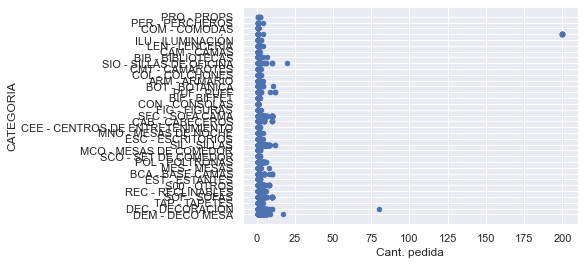

In [32]:
df_pedidos.plot.scatter(x='Cant. pedida',y='CATEGORIA');

In [4]:
df_pedidos.groupby("CATEGORIA").size()

CATEGORIA
                                      30
ARM - ARMARIO                         40
BCA - BASE CAMAS                     253
BIB - BIBLIOTECAS                    130
BIF - BIFFET                         133
BOT - BOTANICA                       312
CAB - CABECEROS                      186
CAM - CAMAS                           55
CEE - CENTROS DE ENTRETENIMIENTO     231
CMT - CAMAROTES                       21
COL - COLCHONES                      142
COM - COMODAS                         25
CON - CONSOLAS                        48
DEC - DECORACIÓN                    2323
DEM - DECO MESA                      387
ESC - ESCRITORIOS                    299
EST - ESTANTES                       166
FIG - FIGURAS                         39
ILU - ILUMINACIÓN                     49
LEN - LENCERÍA                        38
MCO - MESAS DE COMEDOR               323
MES - MESAS                          749
MNO - MESAS DE NOCHE                 162
PER - PERCHEROS                       11
POL - 

In [ ]:
Sector_Publica_defensa=(df_pib[df_pib.item_sector==10])
Sector_Educacion=(df_pib[df_pib.item_sector==9])
Sector_Comercio=(df_pib[df_pib.item_sector==5])
Sector_Financiera=(df_pib[df_pib.item_sector==7])

In [ ]:
df_pedidos_DEM=df_pedidos.loc[df_pedidos.loc[:, 'CATEGORIA'] == 'DEM - DECO MESA']
df_pedidos_DEM

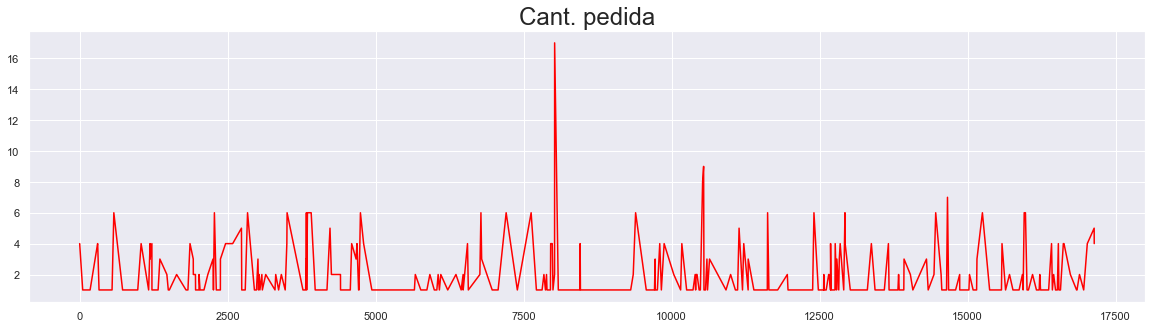

In [8]:
df_pedidos_DEM['Cant. pedida'].plot(figsize = (20,5), color = "red")
plt.title("Cant. pedida", size = 24)
plt.show()

In [9]:
df_pedidos_DEM_fecha=df_pedidos_DEM.resample('Q').mean()
df_pedidos_DEM_fecha

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Int64Index'